<a href="https://colab.research.google.com/github/plsui79/hello-world/blob/master/gg_30_%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%E1%84%8C%E1%85%B5%E1%86%A8%E1%84%89%E1%85%A5%E1%86%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



회귀직선
==
붓꽃 꽃잎길이 예측, 
--

몸무게 예측
--


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split


In [0]:
from sklearn import datasets 
iris = datasets.load_iris()

In [0]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
#print(iris.feature_names)
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [0]:
X_all = iris.data 
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [0]:
X = X_all[:,[0,1,3]]
y = X_all[:, 2]
print(X[0:3])
print(y[0:3])

[[5.1 3.5 0.2]
 [4.9 3.  0.2]
 [4.7 3.2 0.2]]
[1.4 1.4 1.3]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
%matplotlib inline
import matplotlib.pyplot as plt
#plt.scatter(X_train, y_train, marker='o') 
#plt.xlabel("Sepal length") 
#plt.ylabel("Petal length")

In [0]:
from sklearn.linear_model import LinearRegression 
linr = LinearRegression()
linr.fit(X_train, y_train)
print("Score : {:.3f}".format(linr.score(X_test, y_test)))


Score : 0.953


In [0]:
print(linr.coef_) 
print(linr.intercept_)

[ 0.77087396 -0.69457477  1.3946368 ]
-0.3240210156474377


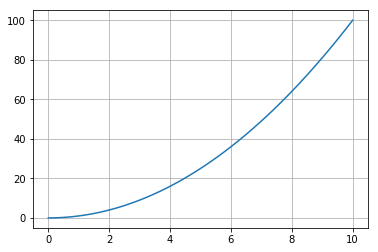

In [0]:
x=np.linspace(0,10,101)
y=x*x
plt.plot(x,y)
plt.grid()

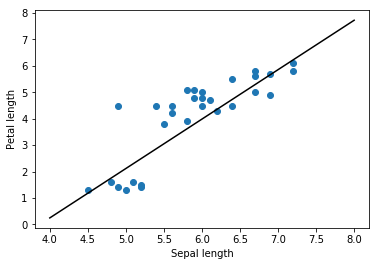

In [0]:
plt.scatter(X_test, y_test, marker='o') 
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

XX = np.linspace(4, 8, 3)
plt.plot(XX, linr.coef_ * XX + linr.intercept_, "k-")

## 몸무게 예측

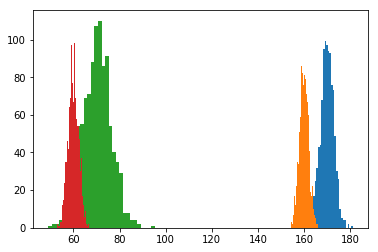

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 160

y1 = 2*x1 - 270 + 2*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + np.random.randn(n_samples) # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

In [0]:
np.random.seed(2018) #고정 시키기
np.random.rand(5)

array([0.88234931, 0.10432774, 0.90700933, 0.3063989 , 0.44640887])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[2.05239618]
0.8864037392968359


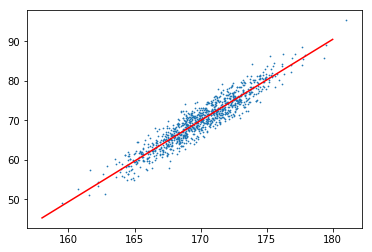

In [0]:
xs = np.linspace(158,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.01006645]
-101.61888879306434
0.7876375183310772


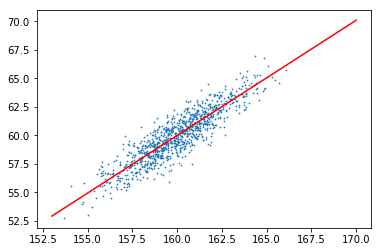

In [0]:
xs = np.linspace(153,170,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

In [0]:
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.13585504]
-122.43005529724655
0.851620807951198


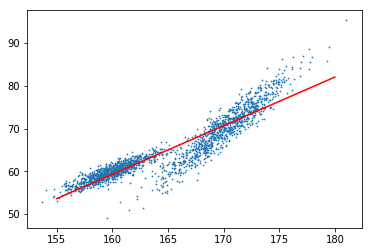

In [0]:
xs = np.linspace(155,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [0]:
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)
X

height  sex
0     171.258722    0
1     172.758793    0
2     166.097763    0
3     170.864899    0
4     168.843933    0
5     166.310756    0
6     169.963536    0
7     173.329455    0
8     172.319810    0
9     169.094522    0
10    170.913063    0
11    172.919450    0
12    171.957888    0
13    171.995353    0
14    172.193755    0
15    173.781936    0
16    164.531022    0
17    170.792307    0
18    173.420923    0
19    171.615968    0
20    172.349224    0
21    173.601452    0
22    172.317797    0
23    175.658332    0
24    170.657432    0
25    164.492474    0
26    170.068695    0
27    168.727115    0
28    172.834894    0
29    173.745309    0
...          ...  ...
1970  163.632413    1
1971  161.498687    1
1972  161.498632    1
1973  158.481696    1
1974  163.294058    1
1975  159.211552    1
1976  160.579179    1
1977  159.811276    1
1978  161.732534    1
1979  160.677694    1
1980  159.123587    1
1981  160.567347    1
1982  160.357726    1
1983  160.253823    1
1984  160.849511    1
1985  160.458335    1
1986  158.870867    1
1987  161.468359    1
1988  158.272491    1
1989  161.124558    1
1990  159.150167    1
1991  160.730945    1
1992  159.686370    1
1993  157.721817    1
1994  160.913128    1
1995  162.796135    1
1996  161.718747    1
1997  158.857202    1
1998  162.312222    1
1999  159.355381    1

[2000 rows x 2 columns]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

print(leg.coef_)
print(leg.intercept_)
print(leg.score(X_test, y_test))

[1.72578289 7.324068  ]
-223.42457090078727
0.914585925512106


In [0]:
X_train[:10]

height  sex
765   172.497761    0
90    170.549973    0
176   170.694155    0
682   168.658824    0
98    171.493804    0
1322  160.693912    1
1994  160.913128    1
877   167.802197    0
1486  160.707133    1
1453  155.902037    1

In [0]:
X_sample=[[179,1],[160,0]]
leg.predict(X_sample)

array([92.81463484, 52.70069188])

## 교차검증

In [0]:
from sklearn.cross_validation import cross_val_score, KFold

/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
X.shape[1]

2

In [0]:
cross_val = KFold(X.shape[0], 10, shuffle=True)
print(cross_val_score(leg, X, y, cv=cross_val))

[0.91730411 0.92643381 0.88982475 0.92241677 0.92051448 0.92369165
 0.92280979 0.92172595 0.91799853 0.9232087 ]


## 결정트리를 이용한 회귀 (뒤에서 설명함)

In [0]:
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train) 
print(dec_reg.score(X_test, y_test))

0.8837243668233168
